In [1]:
import pandas as pd

### data load

In [2]:
# book info
df_book = pd.read_csv("./Crwling_Kyobo_Content.csv", index_col=0)
df_book.tail()

,barcode,title,price,author,publiser,size,page_count,summary,ISBN,category
10240,9788993629095,금강반야바라밀경(한글사경본),"4,000원",대한불교조계종교육원,조계종출판사,188 * 254 mm,93쪽,조계종 교육원이 편역한 『조계종 표준 금강반야바라밀경 - 한글사경본』. 범어 전문가...,9788993629095(8993629099),21
10241,9788982641411,도올의 마가복음 강해,"28,000원",도올 김용옥,통나무,179 * 248 * 48 mm /1243g,612쪽,50여 년간 고전학을 연마해온 도올 김용옥이 그의 생애에서 가장 오랜 기간 집필한 ...,9788982641411(8982641416),21
10242,9788997296705,종교에서 영성으로,"14,000원",길희성,북스코프,137 * 207 * 24 mm /383g,300쪽,“종교의 패러다임을 바꿔야 종교가 산다.” 강화도에 ‘공부와 명상의 집’ 심도학사를...,9788997296705(8997296701),21
10243,9788953135925,팀 켈러의 인생질문,"14,000원",팀 켈러,두란노서원,141 * 207 * 20 mm /348g,272쪽,예수 그리스도를 직접 대면했던 사람들도 오늘의 우리와 똑같이 삶의 커다란 의문들에 ...,9788953135925(8953135923),21
10244,9788954751919,고등 영어영역 영어(2020)(2021 수능대비),"8,100원",EBS교육방송 편집부,EBS한국교육방송공사,205 * 260 * 19 mm /905g,430쪽,2021학년도 대학수학능력시험 준비의 시작은 EBS 수능특강으로!2021학년도 수능...,9788954751919(8954751911),25


In [5]:
# column change : barcode => ISBN

df_book['ISBN'] = df_book['barcode']

In [4]:
# book_review

df_review = pd.read_csv("./Crawling_Kyobo_Review.csv", index_col=0)
df_review.tail()

,ID,ISBN,grade,review,grade_count
42030,th**553,9791162241882,4.0,잘읽히고 시작하기좋네요,4.0
42031,wo**dwofkd,9791162241882,4.0,좋아요!!!!!!!!,4.0
42032,th**lxo123,9791162241882,4.0,좋아요,4.0
42033,wi**iscar,9791162241882,4.0,유튜브 동영상도 있어서 좋습니다,4.0
42034,co**eten01,9791162241882,4.0,너무좋아요,4.0


In [12]:
# groupby

df_review_groupped = df_review.groupby('ISBN').agg({'ID': lambda x: ', '.join(x), 
                                                    'grade': 'sum', 
                                                    'grade_count': 'count', 
                                                    'review': lambda x: ' '.join(x)}).reset_index()
df_review_groupped



,ISBN,ID,grade,grade_count,review
0,9788900291506,"es**wang, sh**0726, so**ip123",12.0,3,중학생이 보기에 딱 좋아요 필요해서 샀는데 보기 좋아요. 옥편 처음 구매했는데 생각...
1,9788900422085,"sc**ass, km**818, MO**601, mo**5521, sw**ang, ...",214.0,55,잘 받았습니다 좋아요 잘받았습니다 좋아요 과학정리에 도움됩니다. 동아출판에서 나온 ...
2,9788900430776,"pg**230, pg**230, ss**u, ne**on75, jl**1203, h...",62.0,16,극어 사전의 정석 국어 사전의 정석 책 사이즈가 좀 크지만 덕분에 글자도 커서 보기...
3,9788900436426,"hi**818, km**2077, jd**28, jh**love, rl**26072...",142.0,37,"과거 2009 교육과정으로 화학1 선행학습을 한 적이 있는데 현행학습을 하는 지금,..."
4,9788900448801,"ju**e7325, ji**holy, ap**echj, sp**ng0909, yu*...",38.0,10,초3 국어에 활용하기도 하지만 모르는 낱말 찾기 좋아요 아이와 함께 볼려고 샀어요....
...,...,...,...,...,...
2098,9791196987909,"ar**a724, na**ko, hi**los, hk**0703, ho**ang, ...",32.0,8,크리스찬이 아니어도 꼭 읽어볼만한 책.\r\n두껍지않고 명료하게 잘 정리되어 있습니...
2099,9791196990718,"sh**1203, ay**2359, sh**1203",12.0,3,인생을 살아가는 동안 평생 우아하게 살아가야겠지만... 어머니에게 선물하기 좋은 책...
2100,9791197008726,so**11,4.0,1,감사합니다
2101,9791197016806,"so**may250, bo**like",8.0,2,누구에게는 위기\r\n누구에게는 기회.\r\n코로나사회적거리두기 이후\r\n다시 일...


In [13]:
df_review_groupped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103 entries, 0 to 2102
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISBN         2103 non-null   int64  
 1   ID           2103 non-null   object 
 2   grade        2103 non-null   float64
 3   grade_count  2103 non-null   int64  
 4   review       2103 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 82.3+ KB


### data concat

In [14]:
df_merge = df_book.merge(df_review_groupped, how='inner', on='ISBN')
df_merge.tail()

,barcode,title,price,author,publiser,size,page_count,summary,ISBN,category,ID,grade,grade_count,review
6189,9791162050767,심우철 실전동형 모의고사 시즌. 2(2020),"14,000원",심우철,심슨북스,251 * 340 * 29 mm /602g,140쪽,1. 최근 4개년 10회분 시험 완벽 반영2016년 ~ 2019년까지 최근 4개년...,9791162050767,31,"se**berry, ma**0686, pb**17274, to**1003, qk**...",69.0,18,굿 역시 우철쌤 퀄리티 좋아요! 공무원 시험 공부에 도움이 됩니다 감사합니다.^^...
6190,9788954640282,법륜 스님의 행복(큰활자본),"15,000원",법륜,나무의마음,157 * 223 * 32 mm /623g,372쪽,법륜 스님은 지난 30년 동안 우리나라 전국방방곡곡은 물론 세계 115개 도시의 강...,9788954640282,21,"re**tte, do**y0116, dl**l73, ch**nrwk11, bo**y...",43.0,11,마음의 힐링... 마음이 따뜻해집니다 좋아요 엄마가 카스에서 법륜스님 페이지에 들어...
6191,9788996508830,광명진언사경,"4,000원",김현준,새벽숲,188 * 259 * 20 mm /268g,120쪽,『광명진언사경』은 광명진언을 1080번 쓸 수 있도록 엮은 것이다. 하루 108번씩...,9788996508830,21,ch**438,4.0,1,"시간될때마다 쓰는데, 마음도 차분해지고 좋아요."
6192,9788963603438,신은 존재하는가,"12,000원",리처드 스윈번,복있는사람,141 * 210 * 21 mm /298g,228쪽,"‘우주는 왜 존재하는가?’, ‘이 우주에서 작용하는 과학법칙들은 무엇을 의미하는가?...",9788963603438,21,dy**m73,3.0,1,신에 대한 물음은 삶의 근원을 돌아보는 핵심 질문입니다
6193,9788932816425,내면세계의 질서와 영적 성장,"15,000원",고든 맥도날드,IVP,141 * 201 * 18 mm /417g,344쪽,“수많은 이들의 인생을 바꾼 책. 읽을 때마다 새로운 감동과 도전을 안겨 준다.” ...,9788932816425,21,"ja**sion92, cy**5, nj**gwon, cy**5, hy**espoir...",69.0,18,전도사님 추천으로 구매했습니다^^ 내용이 가벼운 편이 아니라 술술 읽기에는 어렵지만...


In [15]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6194 entries, 0 to 6193
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   barcode      6194 non-null   int64  
 1   title        6194 non-null   object 
 2   price        6194 non-null   object 
 3   author       6194 non-null   object 
 4   publiser     6194 non-null   object 
 5   size         6194 non-null   object 
 6   page_count   6194 non-null   object 
 7   summary      6194 non-null   object 
 8   ISBN         6194 non-null   int64  
 9   category     6194 non-null   int64  
 10  ID           6194 non-null   object 
 11  grade        6194 non-null   float64
 12  grade_count  6194 non-null   int64  
 13  review       6194 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 725.9+ KB


In [35]:
# extract necessary columns
df_book_final = df_merge[['category', 'ISBN', 'title', 'author', 'publiser', 'price', 'size', 'page_count', 'summary', 'ID', 'grade', 'grade_count', 'review']]

In [36]:
# drop duplicated data
df_book_final2 = df_book_final.drop_duplicates(['ISBN'], keep='first').reset_index(drop=True)

In [37]:
df_book_final2

,category,ISBN,title,author,publiser,price,size,page_count,summary,ID,grade,grade_count,review
0,5,9791136000989,한국사능력검정시험 2주끝장 고급,한국사기출연구회,에듀윌,"21,000원",213 * 295 * 29 mm /1360g,496쪽,수험서ㆍ 한국사능력검정시험 베스트셀러 1위진짜 2주 합격을 증명한 에듀윌 2주끝장의...,"rk**k67, pr**epo, qn**nf444, ko**ic21, mr**0m,...",93.0,24,정리가 잘 돼 있슴다 추천받아 샀는데 괜찮아요 내용도 강의도~ 맘에들어요 열심히 공...
1,5,9791156643876,한번에 통과하는 논문,히든그레이스 논문통계팀,한빛아카데미,"23,000원",189 * 258 * 20 mm /846g,420쪽,SPSS 분석 방법부터 결과표 작성과 해석 방법까지 논문 초심자...,"dr**1082, ca**willy, dr**on9314, he**ldc, ye**...",88.0,22,한번 정리하듯 읽어보니.. 잘정리된 듯함\r\n동영상도 함께 보니 도움됨 통계초보자...
2,5,9791189683368,작은 출판사 차리는 법,이현화,유유,"10,000원",116 * 190 * 11 mm /151g,184쪽,고군분투하며 출판사를 차리고 꾸려 온 지 어언 2년. 저자는 그동안의 경험을 『작은...,"ra**poet, go**0318, ra**poet, go**0318",14.0,4,2년차 출판사 대표의 분투기. 매끄럽게 잘 읽힌다. 막연하게만 들어왔던 1인 출판사...
3,5,9791160505801,관계를 읽는 시간,문요한,더퀘스트,"16,000원",147 * 207 * 32 mm /526g,320쪽,사람들은 늘 인간관계 때문에 힘들어하면서 “내 맘 같지 않다”고 한탄한다. ‘성장하...,"yo**di01, di**y0211, k6**0809, yo**di01, di**y...",36.0,9,잘읽을게요 단숨에 읽히네요. 나와 내주변에 대해 생각하게 하는 책. 가슴에 와 ...
4,5,9788932022888,피로사회,한병철,문학과지성사,"12,000원",153 * 224 * 20 mm /160g,128쪽,"『피로사회』는 현대사회의 성과주의에 대하여 날카롭게 비판한 책으로, 독일의 주요 언...","se**hun01, AP**S, na**04k, ce**ne1230, up**000...",69.0,18,생각해 볼 거리를 많이 만들어주는 좋은 책입니다 좋아요 현대는 외적인 폭력이 아니라...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,31,9791162050767,심우철 실전동형 모의고사 시즌. 2(2020),심우철,심슨북스,"14,000원",251 * 340 * 29 mm /602g,140쪽,1. 최근 4개년 10회분 시험 완벽 반영2016년 ~ 2019년까지 최근 4개년...,"se**berry, ma**0686, pb**17274, to**1003, qk**...",69.0,18,굿 역시 우철쌤 퀄리티 좋아요! 공무원 시험 공부에 도움이 됩니다 감사합니다.^^...
1981,21,9788954640282,법륜 스님의 행복(큰활자본),법륜,나무의마음,"15,000원",157 * 223 * 32 mm /623g,372쪽,법륜 스님은 지난 30년 동안 우리나라 전국방방곡곡은 물론 세계 115개 도시의 강...,"re**tte, do**y0116, dl**l73, ch**nrwk11, bo**y...",43.0,11,마음의 힐링... 마음이 따뜻해집니다 좋아요 엄마가 카스에서 법륜스님 페이지에 들어...
1982,21,9788996508830,광명진언사경,김현준,새벽숲,"4,000원",188 * 259 * 20 mm /268g,120쪽,『광명진언사경』은 광명진언을 1080번 쓸 수 있도록 엮은 것이다. 하루 108번씩...,ch**438,4.0,1,"시간될때마다 쓰는데, 마음도 차분해지고 좋아요."
1983,21,9788963603438,신은 존재하는가,리처드 스윈번,복있는사람,"12,000원",141 * 210 * 21 mm /298g,228쪽,"‘우주는 왜 존재하는가?’, ‘이 우주에서 작용하는 과학법칙들은 무엇을 의미하는가?...",dy**m73,3.0,1,신에 대한 물음은 삶의 근원을 돌아보는 핵심 질문입니다


### Text Analyze to find trend by category

#### text in dataframe to list and to text file

In [94]:
# 1(소설), 3(시/에세이), 5(인문), 15(자기계발)
summarys_novel = []
summarys_essay = []
summarys_humanity = []
summarys_selfdevelop = []
summarys_IT = []

for i in range(len(df_book_final2)):
    if df_book_final2['category'][i] == 1:
        summary_n = df_book_final2['summary'][i]
        summarys_novel.append(summary_n)
    elif df_book_final2['category'][i] == 3:
        summary_e = df_book_final2['summary'][i]
        summarys_essay.append(summary_e)
    elif df_book_final2['category'][i] == 5:
        summary_h = df_book_final2['summary'][i]
        summarys_humanity.append(summary_h)
    elif df_book_final2['category'][i] == 15:
        summary_sd = df_book_final2['summary'][i]
        summarys_selfdevelop.append(summary_sd)
    elif df_book_final2['category'][i] == 33:
        summary_IT = df_book_final2['summary'][i]
        summarys_IT.append(summary_IT)
        
len(summarys_novel), len(summarys_essay), len(summarys_humanity), len(summarys_selfdevelop),len(summarys_IT)

(150, 141, 146, 127, 126)

In [43]:
text_n = ' '.join(summarys_novel)
text_e = ' '.join(summarys_essay)
text_h = ' '.join(summarys_humanity)
text_sd = ' '.join(summarys_selfdevelop)

In [95]:
text_IT = ' '.join(summarys_IT)

In [44]:
with open('summary_novel.txt', 'w', encoding='utf8') as f:
    f.write(text_n)
with open('summary_essay.txt', 'w', encoding='utf8') as f2:
    f2.write(text_e)
with open('summary_humanity.txt', 'w', encoding='utf8') as f3:
    f3.write(text_h)
with open('summary_selfdevelopment.txt', 'w', encoding='utf8') as f4:
    f4.write(text_sd)

In [96]:
with open('summary_IT.txt', 'w', encoding='utf8') as f5:
    f5.write(text_IT)

In [45]:
summary_novel_text = open('summary_novel.txt', encoding='utf8').read()
summary_essay_text = open('summary_essay.txt', encoding='utf8').read()
summary_humanity_text = open('summary_humanity.txt', encoding='utf8').read()
summary_selfdev_text = open('summary_selfdevelopment.txt', encoding='utf8').read()

In [97]:
summary_IT_text = open('summary_IT.txt', encoding='utf8').read()

#### NLTK

In [46]:
import nltk
from konlpy.corpus import kobill

In [47]:
# extract Nouns
from konlpy.tag import Okt
t = Okt()

tokens_ko = t.nouns(summary_novel_text)
tokens_ko2 = t.nouns(summary_essay_text)
tokens_ko3 = t.nouns(summary_humanity_text)
tokens_ko4 = t.nouns(summary_selfdev_text)

In [98]:
tokens_ko5 = t.nouns(summary_IT_text)

#### make word corpus

In [48]:
ko = nltk.Text(tokens_ko, name='novel summary')
ko2 = nltk.Text(tokens_ko2, name='essay summary')
ko3 = nltk.Text(tokens_ko3, name='humanity summary')
ko4 = nltk.Text(tokens_ko4, name='selfdevelopment summary')

In [99]:
ko5 = nltk.Text(tokens_ko5, name='IT summary')

In [49]:
from matplotlib import font_manager, rc
f_path = 'C://Windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

#### remake word corpus not including stop_words

In [101]:
# 소설 말뭉치에서 변별력 없는 단어들
stop_words = ['그', '작가', '작품', '등', '이', '제', '수', '것', '장', '책', '의', '로', '저자', '발표', '번역', '를', '전', '간', '통해', 
              '대학', '학교', '독자', '때', '후', '중', '은', '이후', '내', '권', '출판사', '곳','위해', '위', '뒤', '교수', '대학교', '대학원',
              '더', '졸업']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko2 = [each_word for each_word in ko2 if each_word not in stop_words]
ko3 = [each_word for each_word in ko3 if each_word not in stop_words]
ko4 = [each_word for each_word in ko4 if each_word not in stop_words]

In [102]:
ko5 = [each_word for each_word in ko5 if each_word not in stop_words]

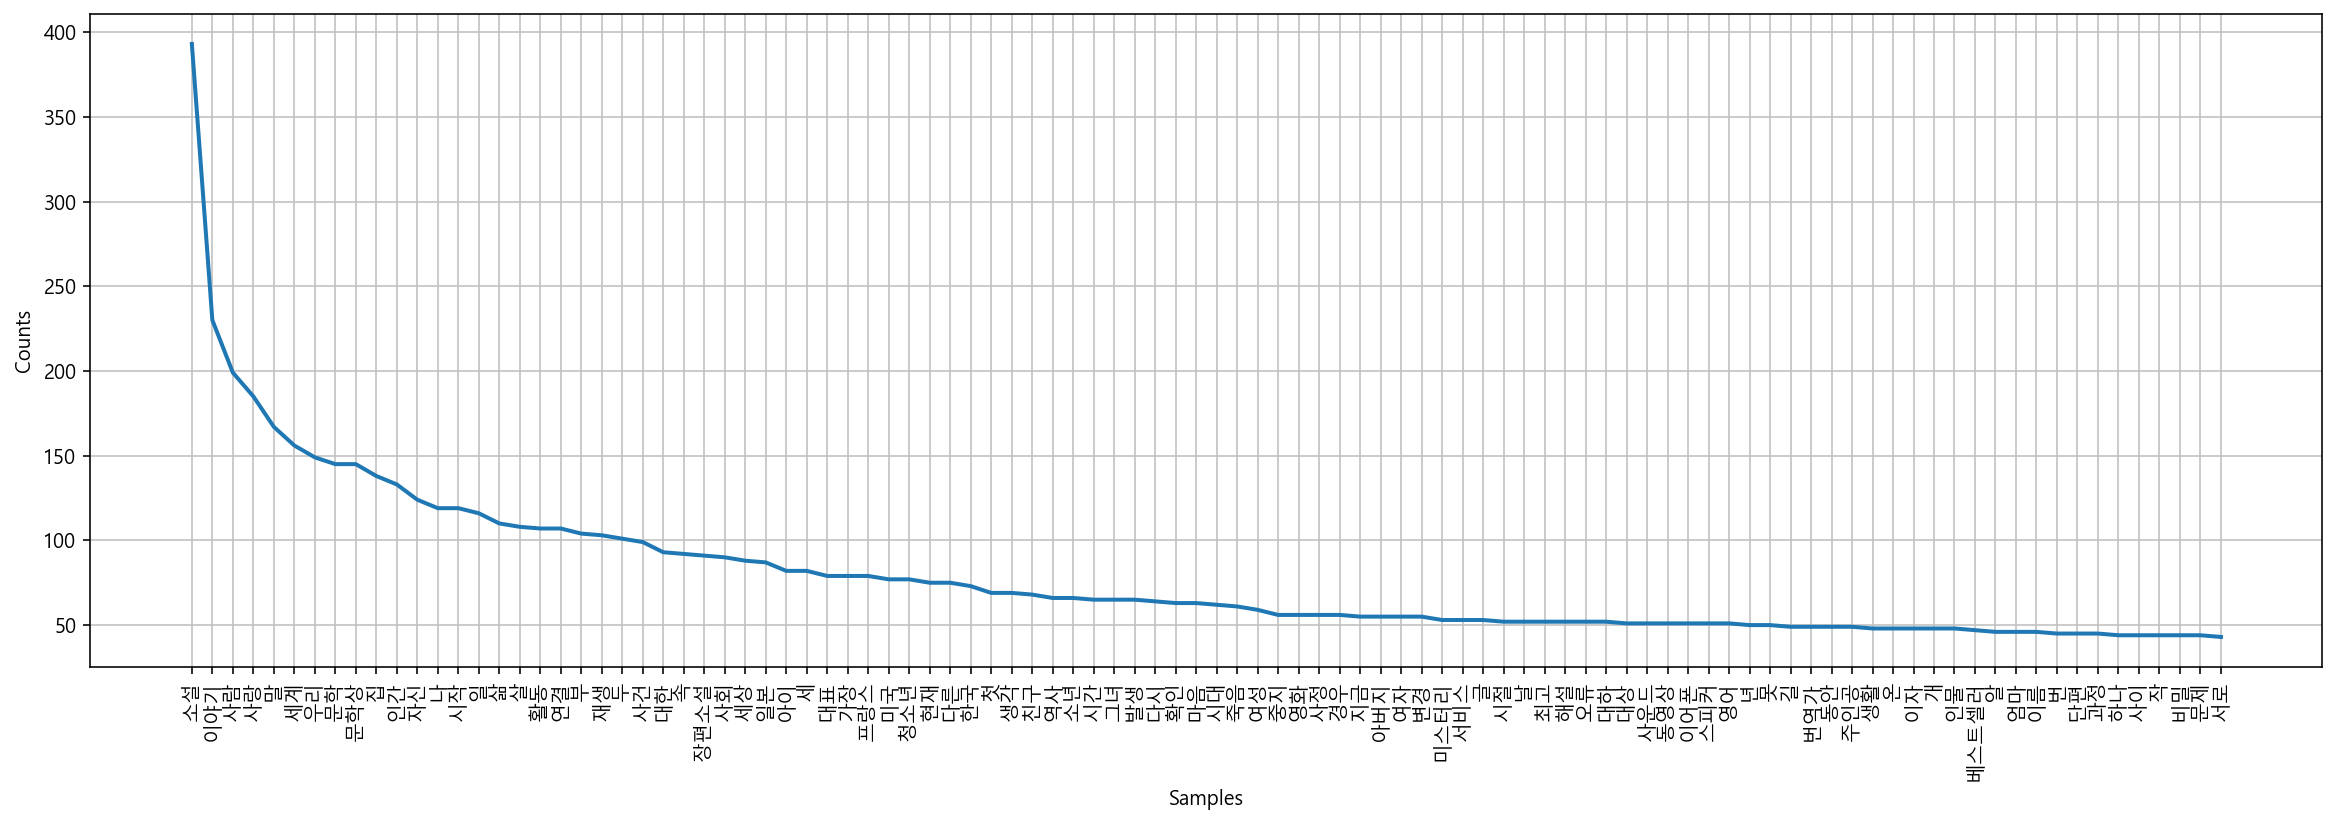

In [78]:
import matplotlib.pyplot as plt 



ko = nltk.Text(ko, name='cleaned novel summary')

plt.figure(figsize=(20, 6))
ko.plot(100)
plt.show()


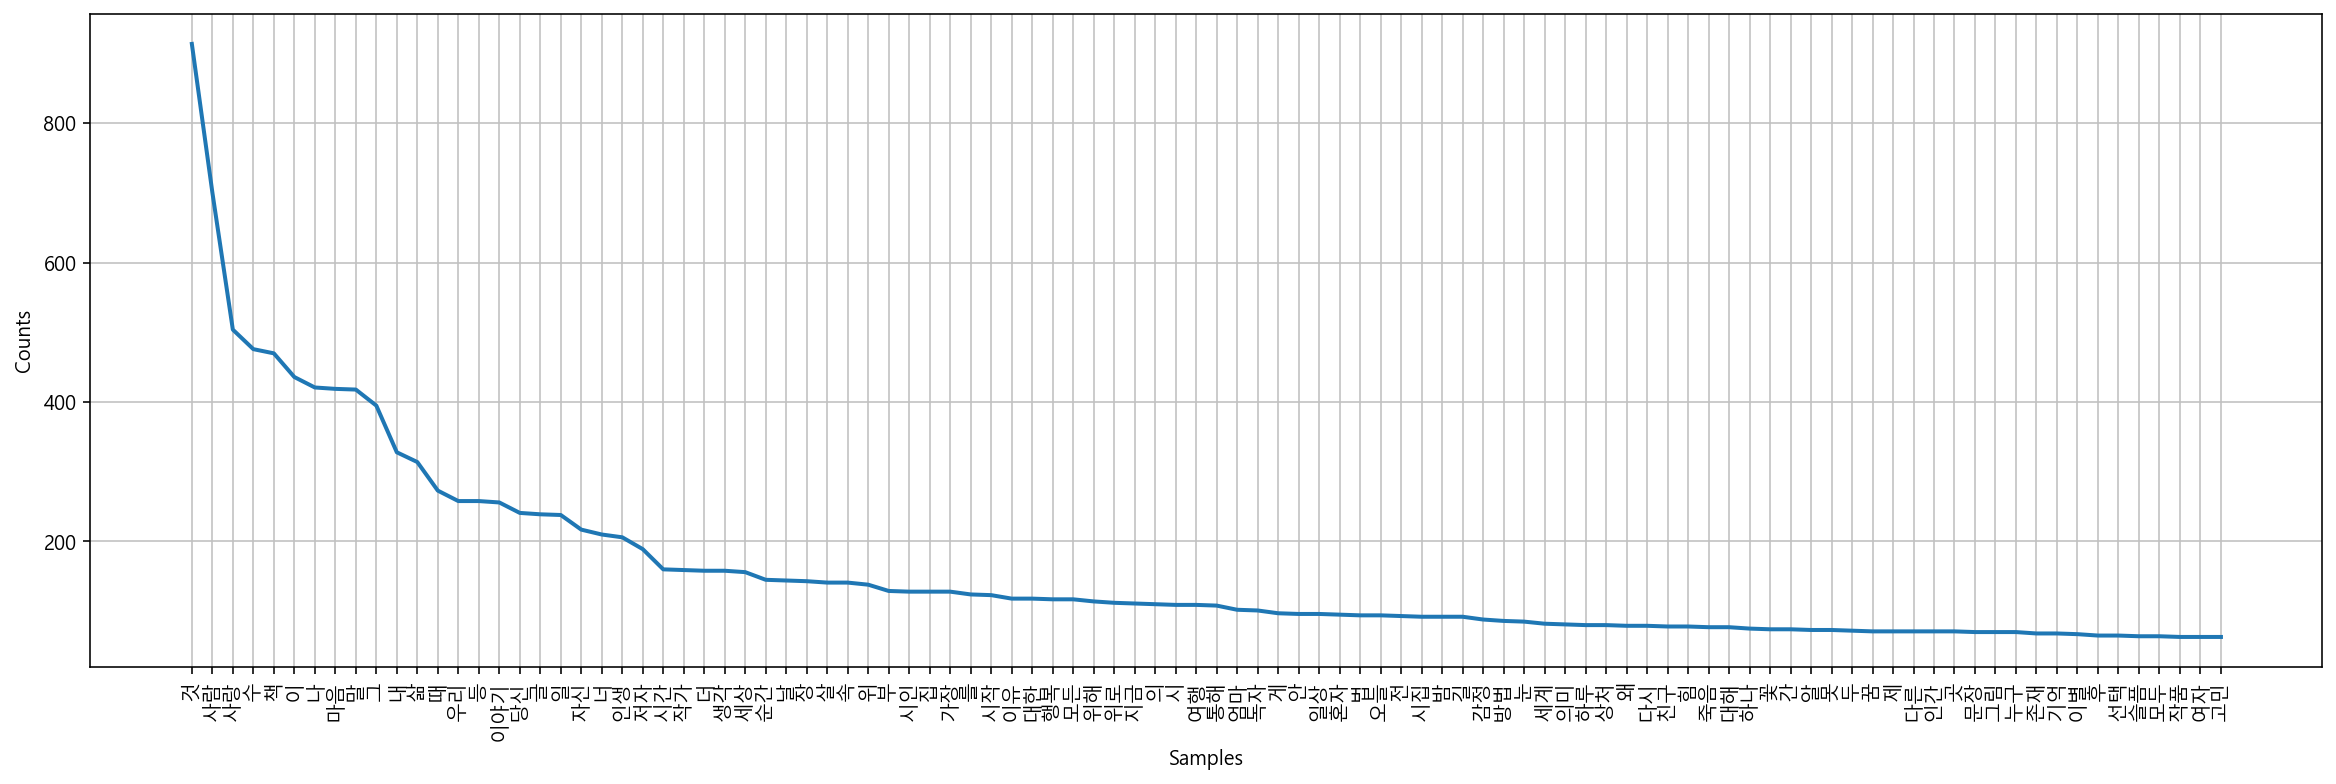

In [55]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 6))
ko2.plot(100)
plt.show()

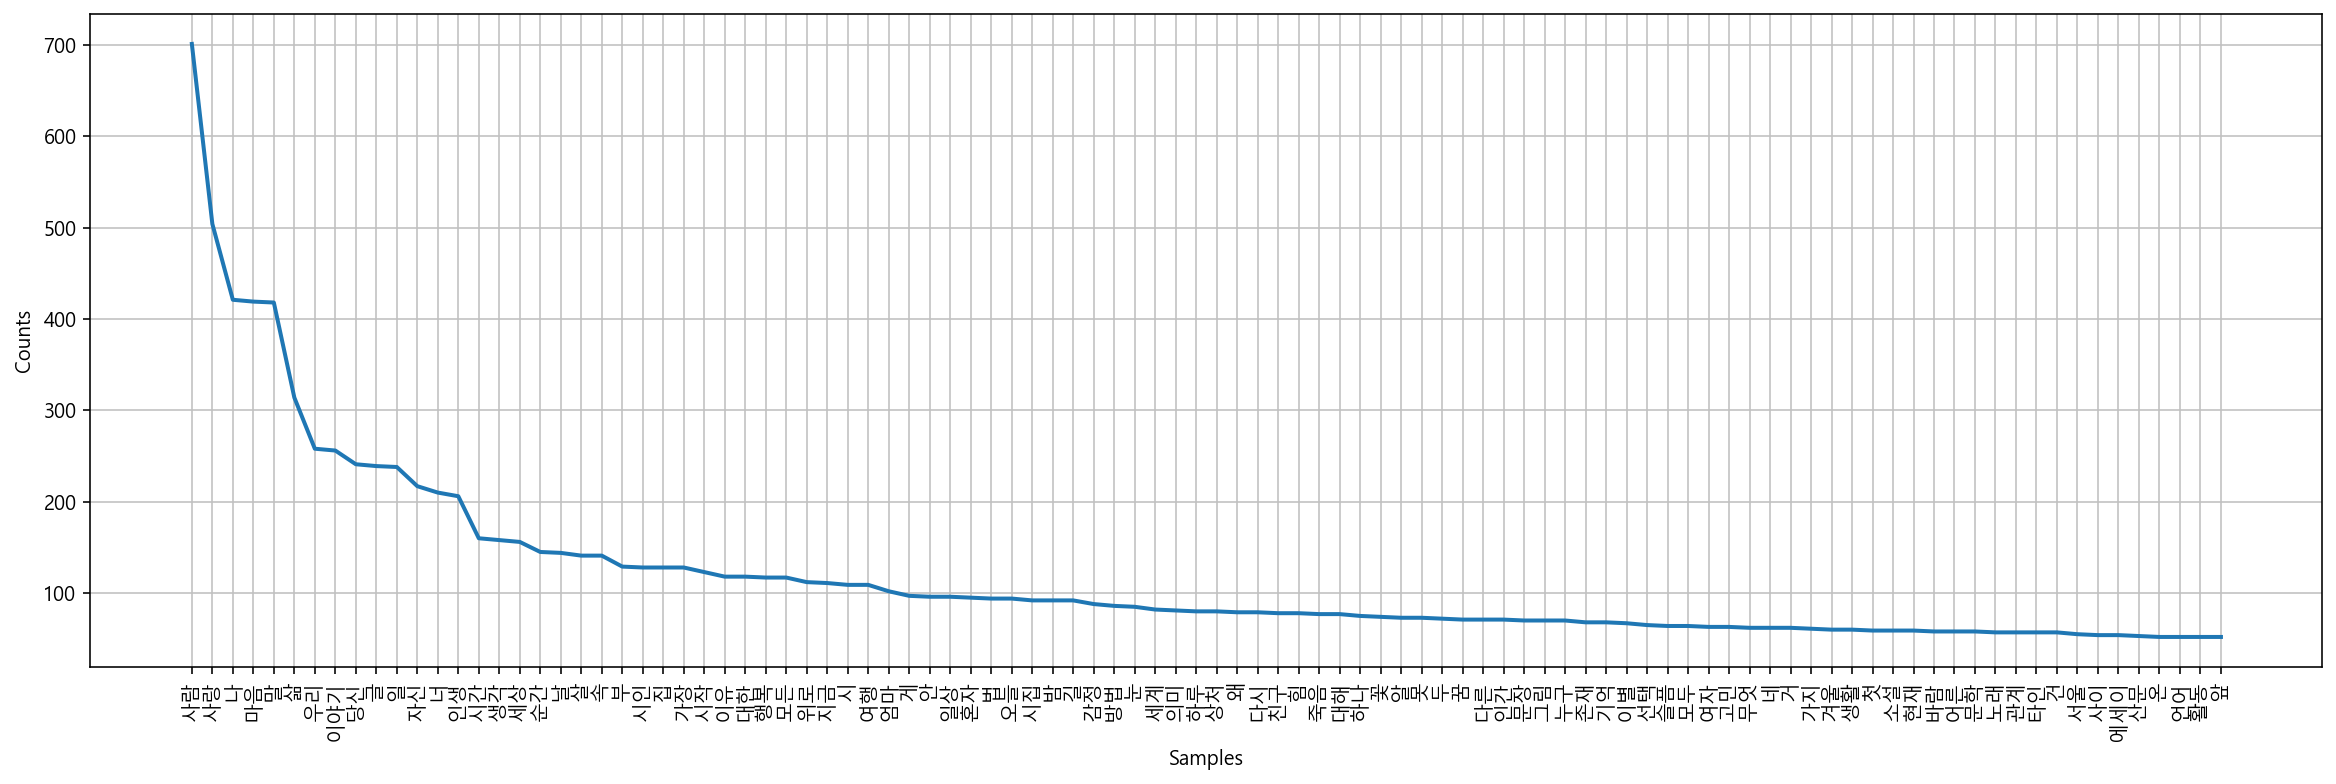

In [79]:
ko2 = nltk.Text(ko2, name='cleaned essay summary')

plt.figure(figsize=(20, 6))
ko2.plot(100)
plt.show()

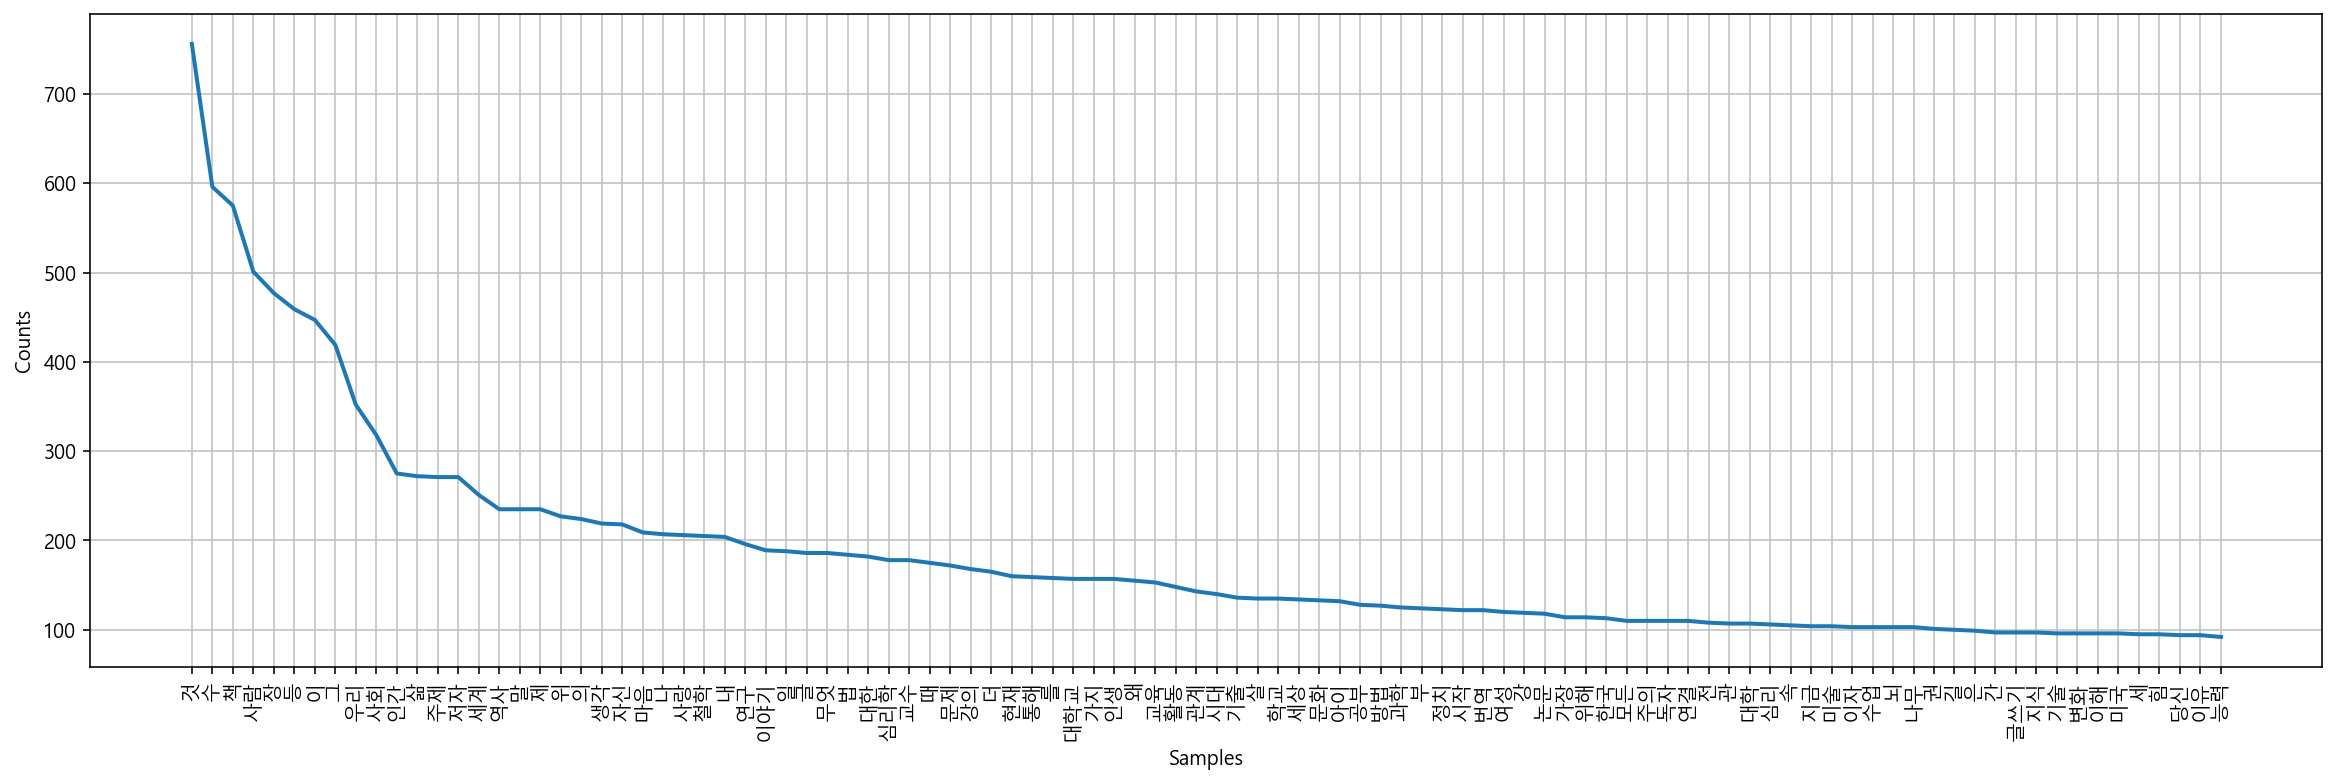

In [56]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 6))
ko3.plot(100)
plt.show()

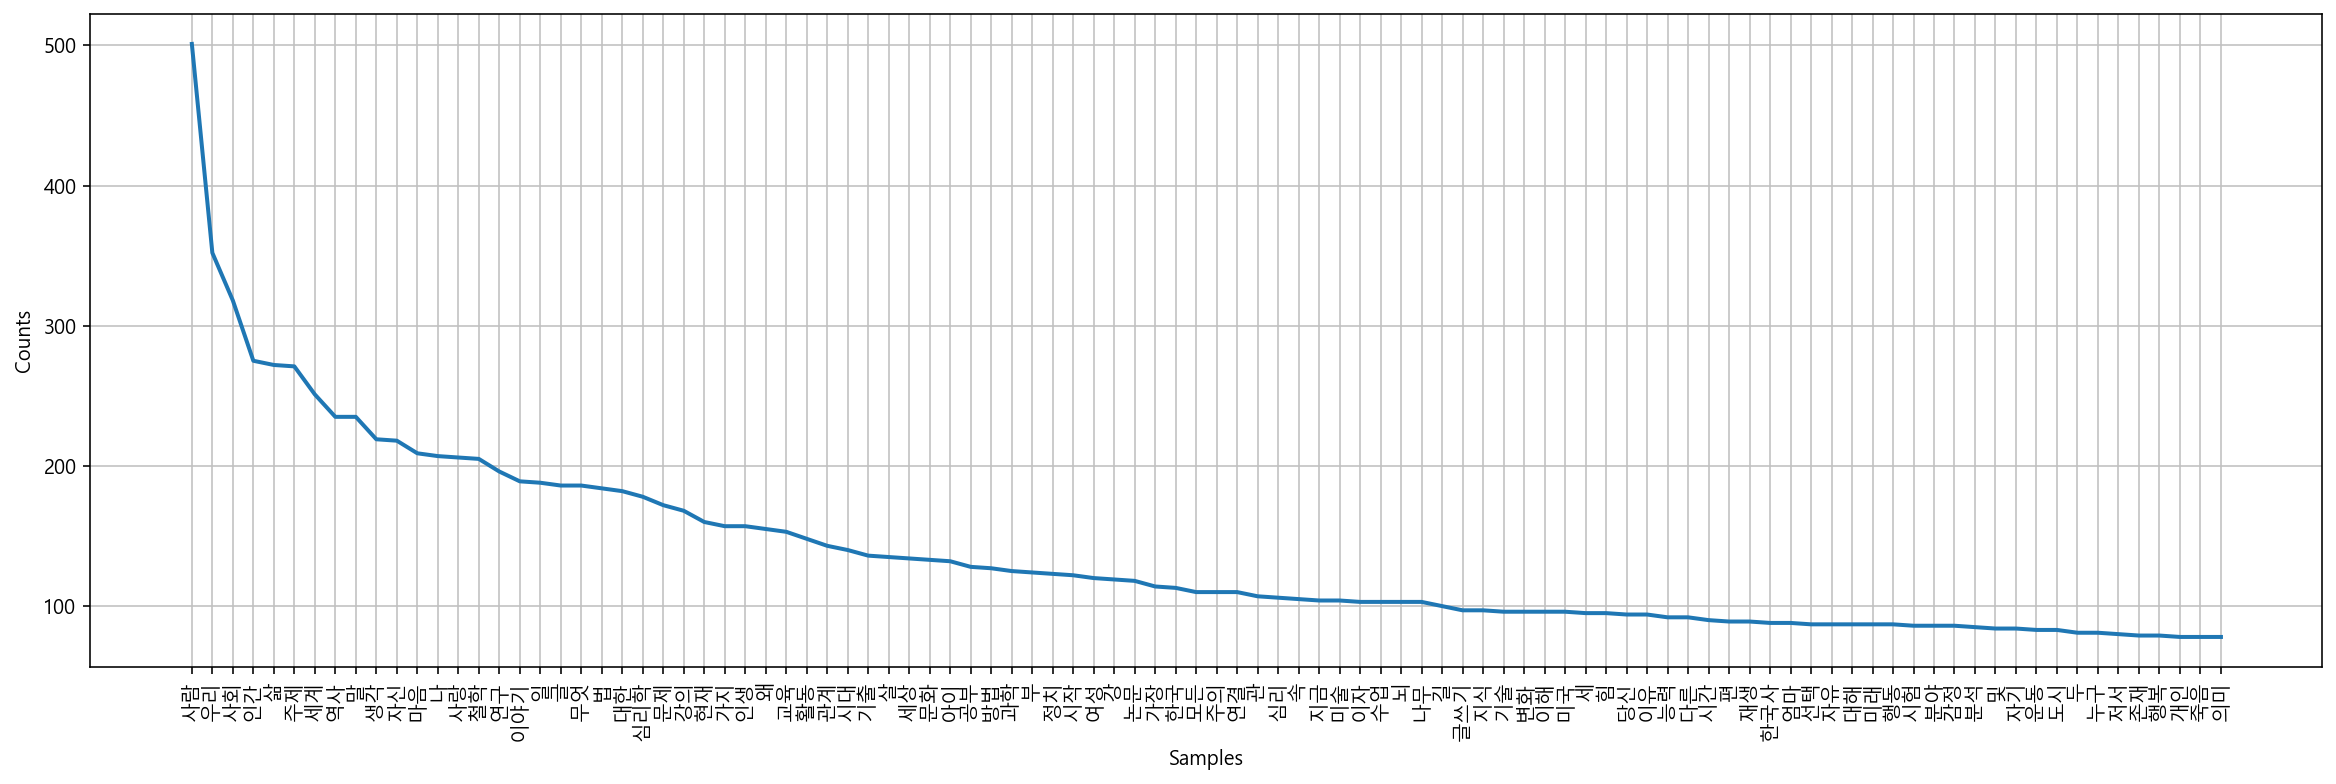

In [80]:
ko3 = nltk.Text(ko3, name='cleaned humanity summary')

plt.figure(figsize=(20, 6))
ko3.plot(100)
plt.show()

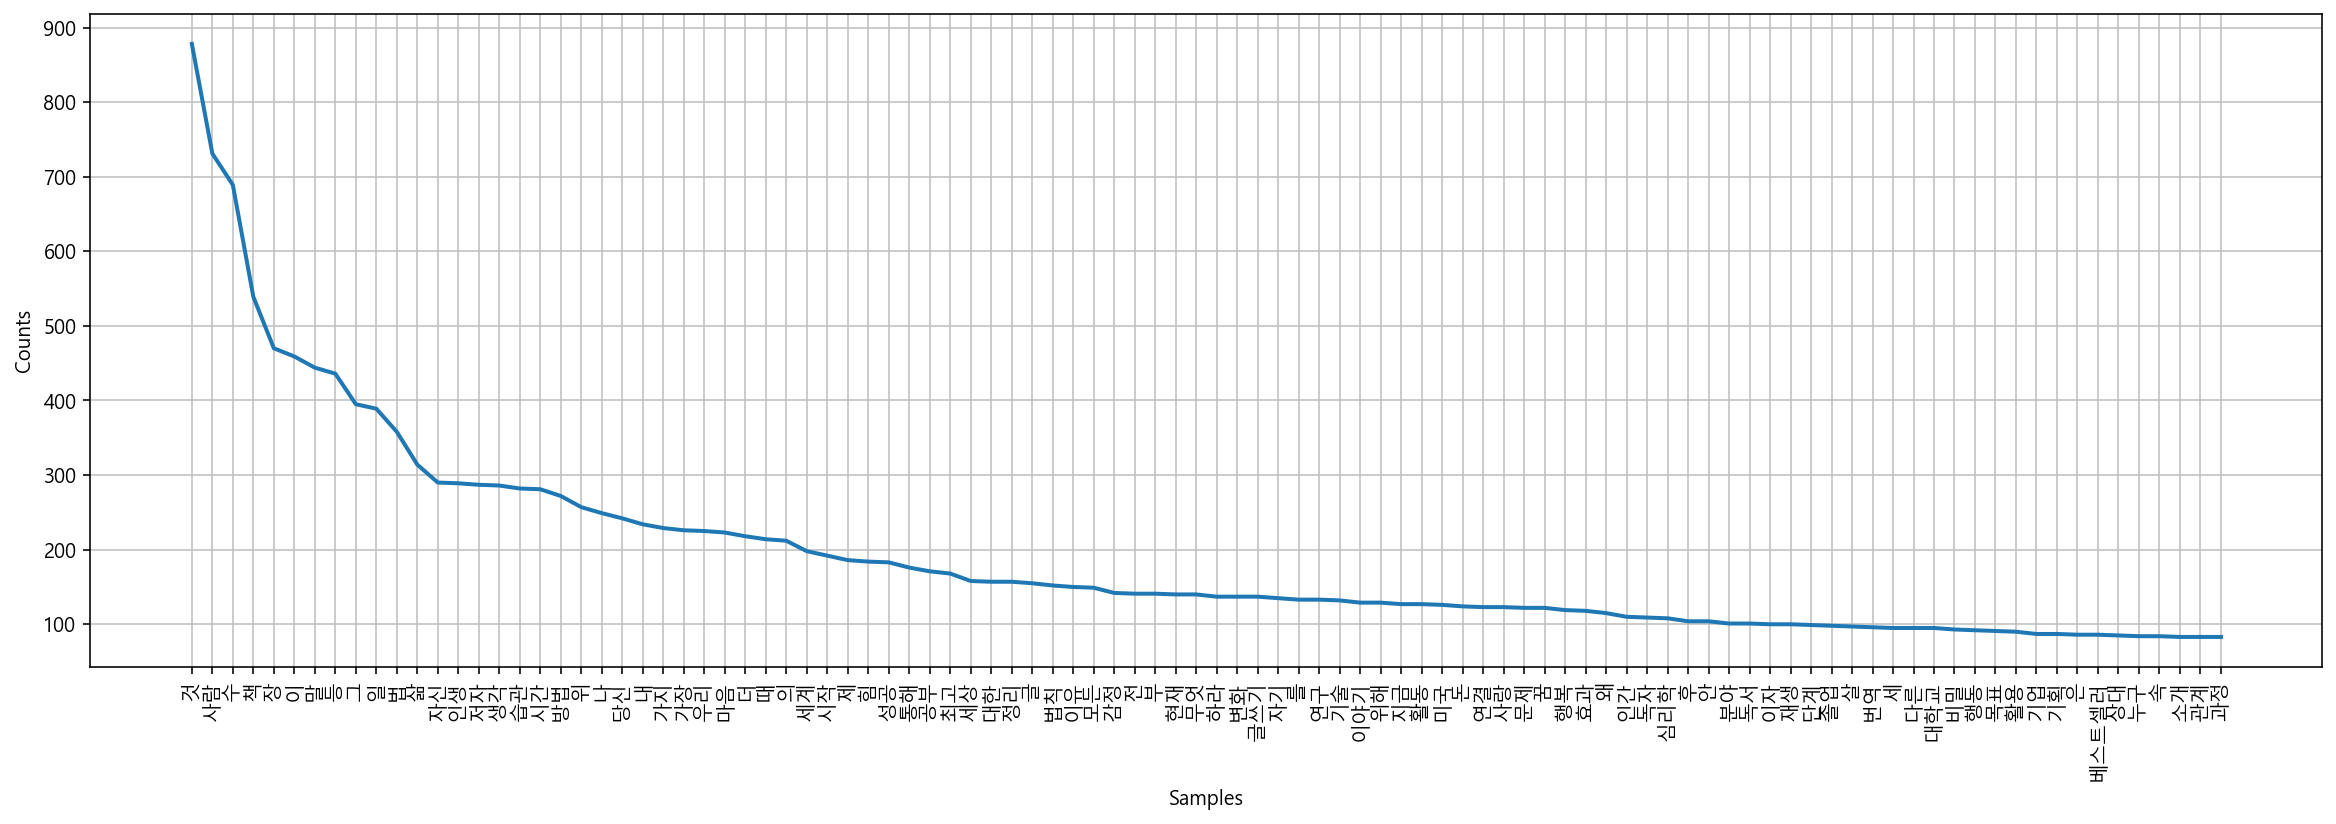

In [57]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 6))
ko4.plot(100)
plt.show()

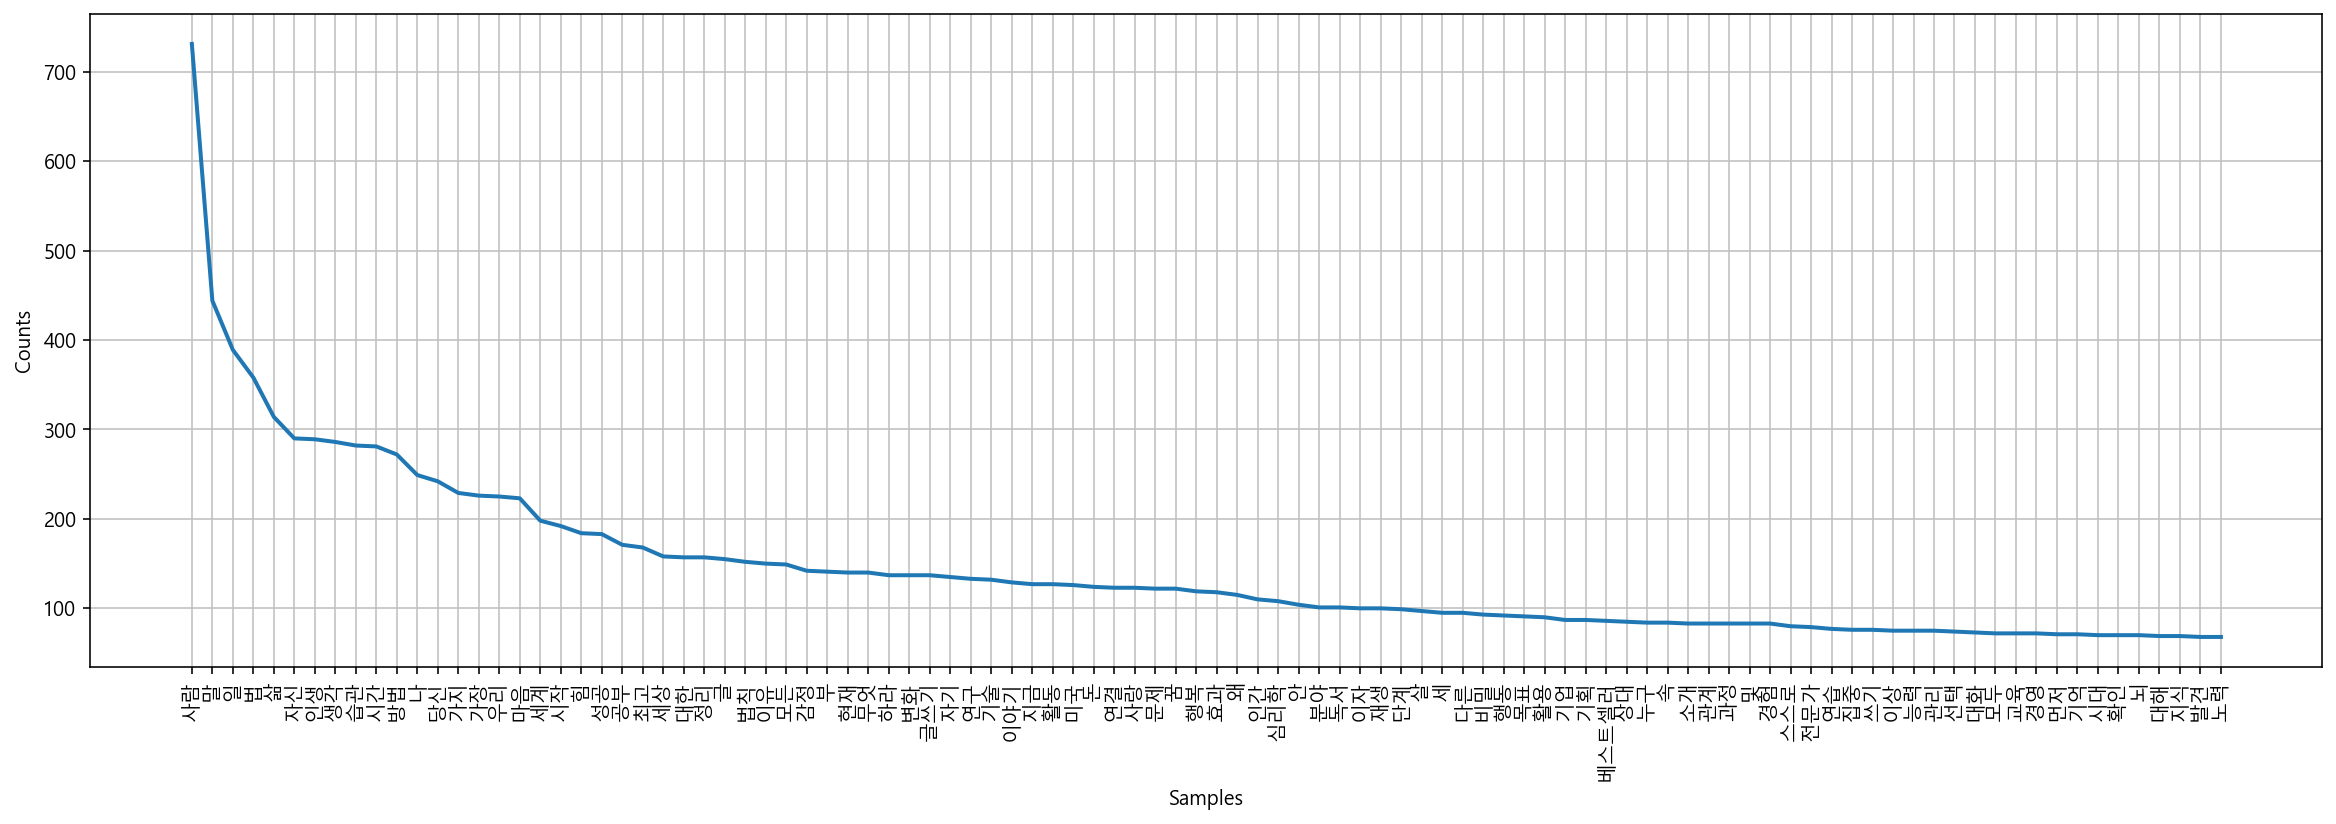

In [81]:
ko4 = nltk.Text(ko4, name='cleaned self-development summary')

plt.figure(figsize=(20, 6))
ko4.plot(100)
plt.show()

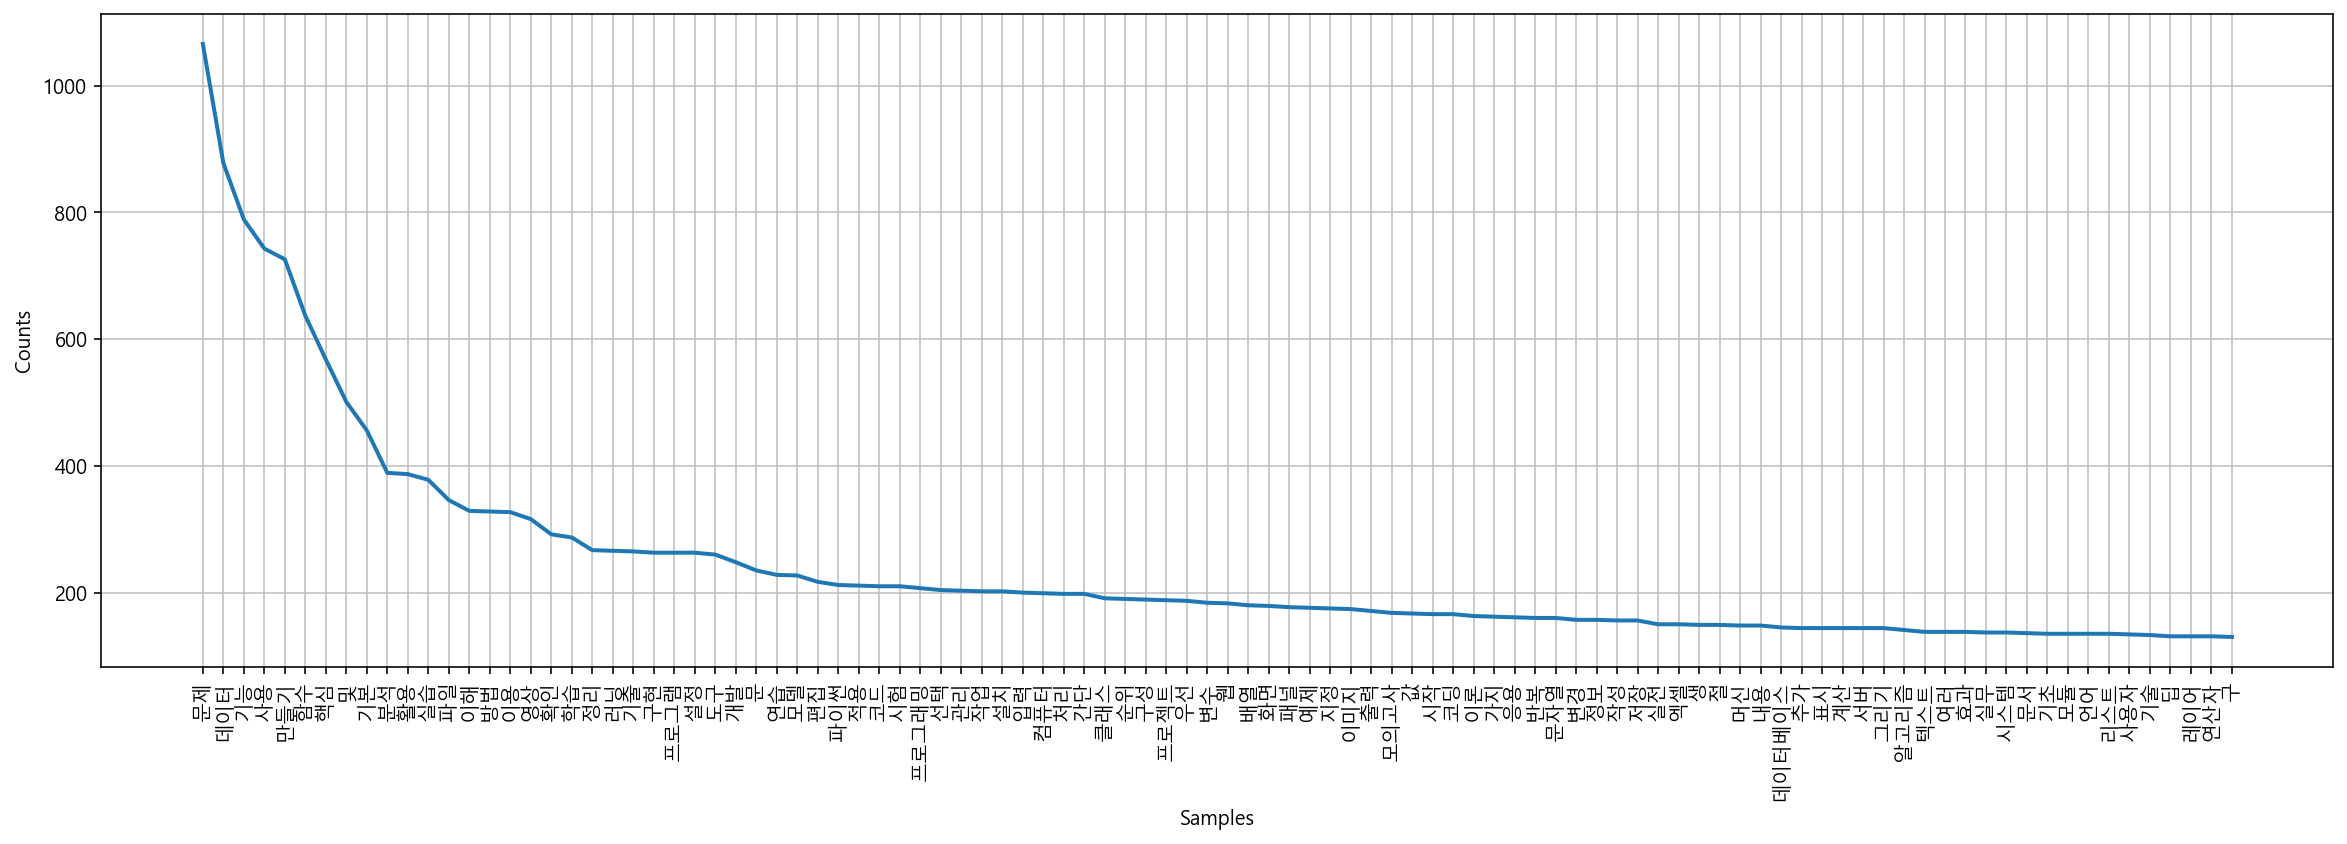

In [103]:
ko5 = nltk.Text(ko5, name='cleaned IT summary')

plt.figure(figsize=(20, 6))
ko5.plot(100)
plt.show()

### word cloud

In [82]:
ko.vocab()

FreqDist({'소설': 393, '이야기': 230, '사람': 199, '사랑': 185, '말': 167, '세계': 156, '우리': 149, '문학': 145, '문학상': 145, '집': 138, ...})

In [83]:
ko2.vocab()

FreqDist({'사람': 701, '사랑': 504, '나': 421, '마음': 419, '말': 418, '삶': 314, '우리': 258, '이야기': 256, '당신': 241, '글': 239, ...})

In [84]:
ko3.vocab()

FreqDist({'사람': 501, '우리': 352, '사회': 318, '인간': 275, '삶': 272, '주제': 271, '세계': 251, '역사': 235, '말': 235, '생각': 219, ...})

In [85]:
ko4.vocab()

FreqDist({'사람': 731, '말': 444, '일': 389, '법': 358, '삶': 314, '자신': 290, '인생': 289, '생각': 286, '습관': 282, '시간': 281, ...})

In [104]:
ko5.vocab()

FreqDist({'문제': 1066, '데이터': 878, '기능': 789, '사용': 743, '만들기': 726, '함수': 637, '핵심': 568, '및': 501, '기본': 456, '분석': 389, ...})

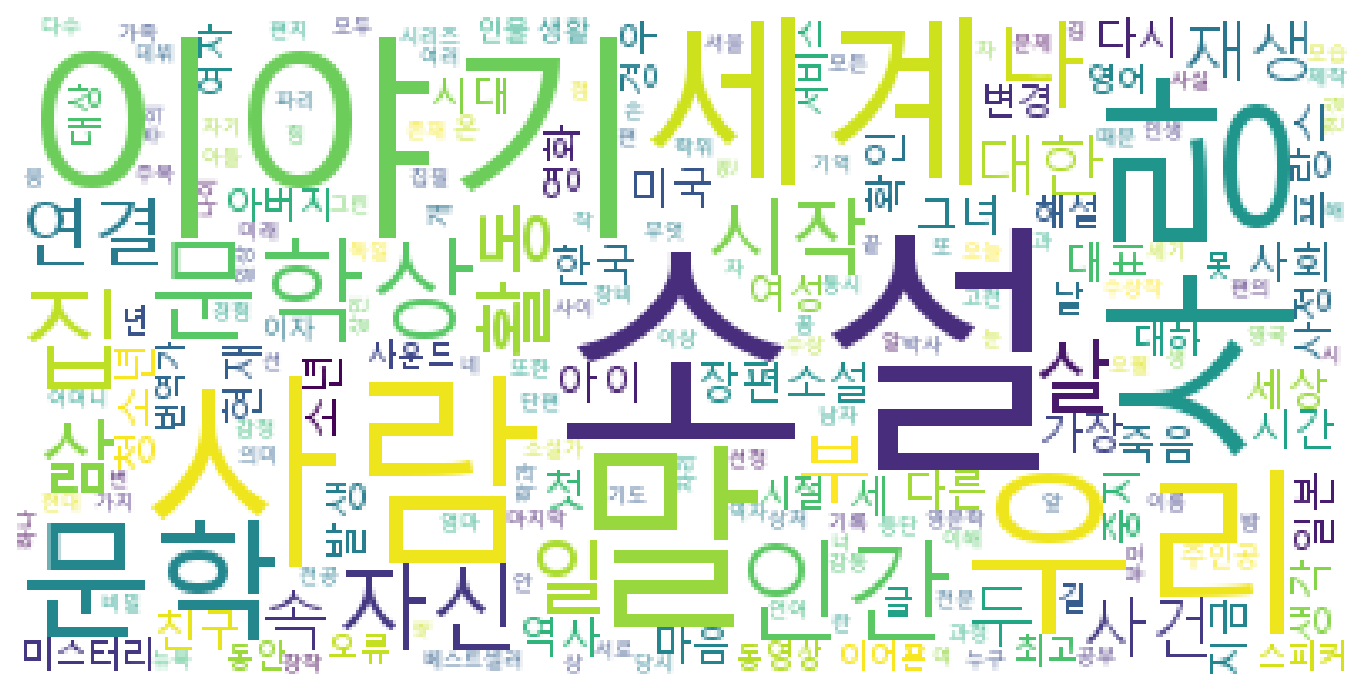

In [86]:
# novel에 많이 나오는 단어(주제)

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path, relative_scaling= 0.2, 
                      background_color='white',
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

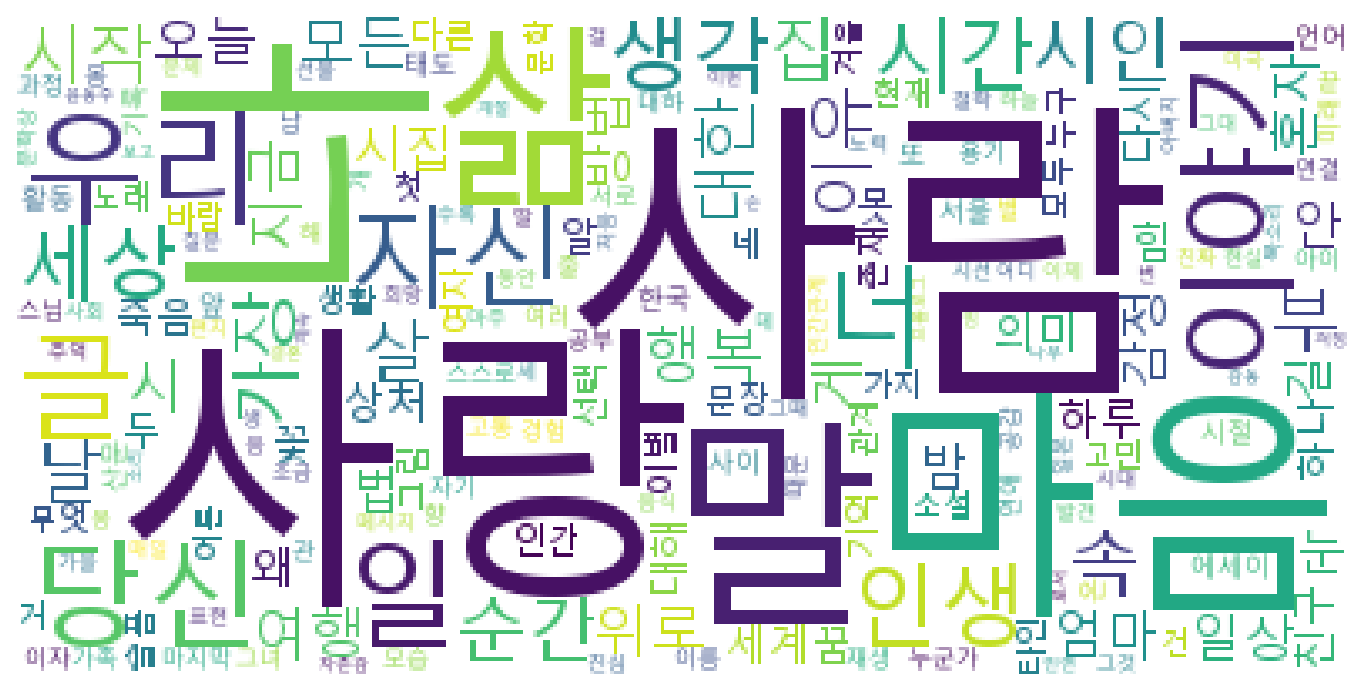

In [87]:
# essay에 많이 나오는 단어(주제)
data2 = ko2.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path, relative_scaling= 0.2, 
                      background_color='white',
                      ).generate_from_frequencies(dict(data2))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

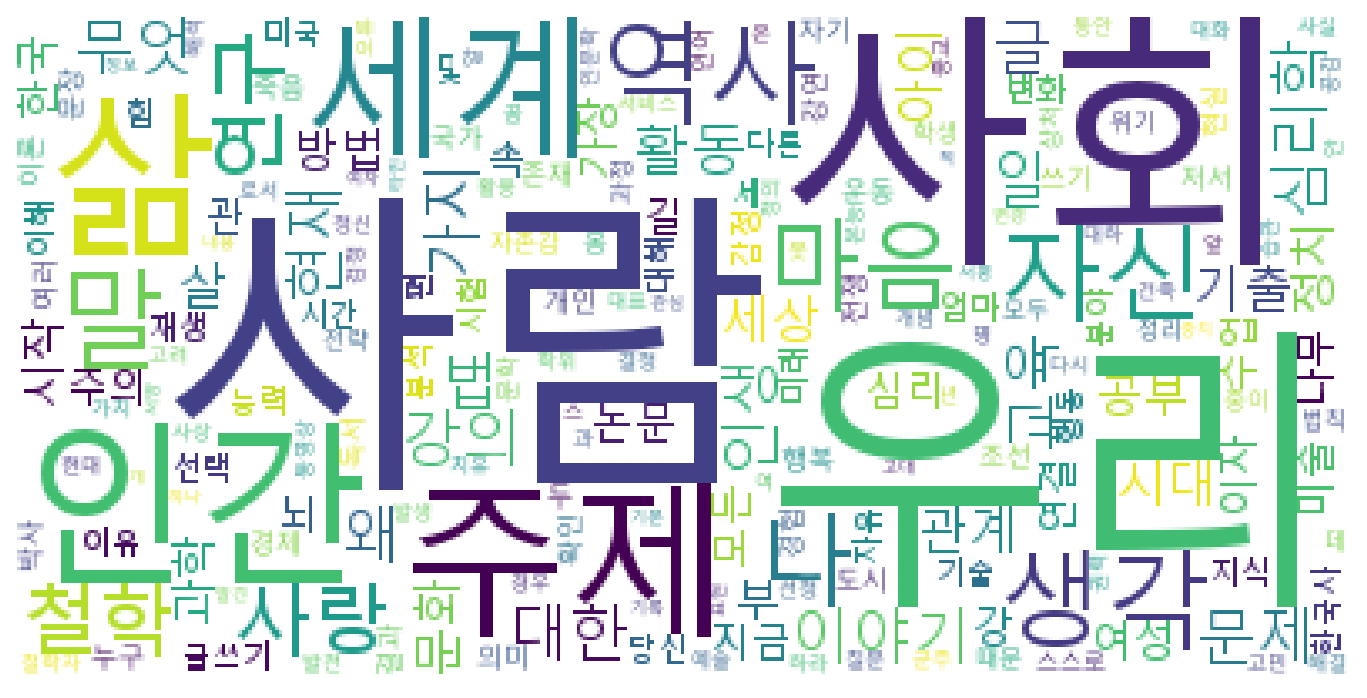

In [88]:
# humanity에 많이 나오는 단어(주제)
data3 = ko3.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path, relative_scaling= 0.2, 
                      background_color='white',
                      ).generate_from_frequencies(dict(data3))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

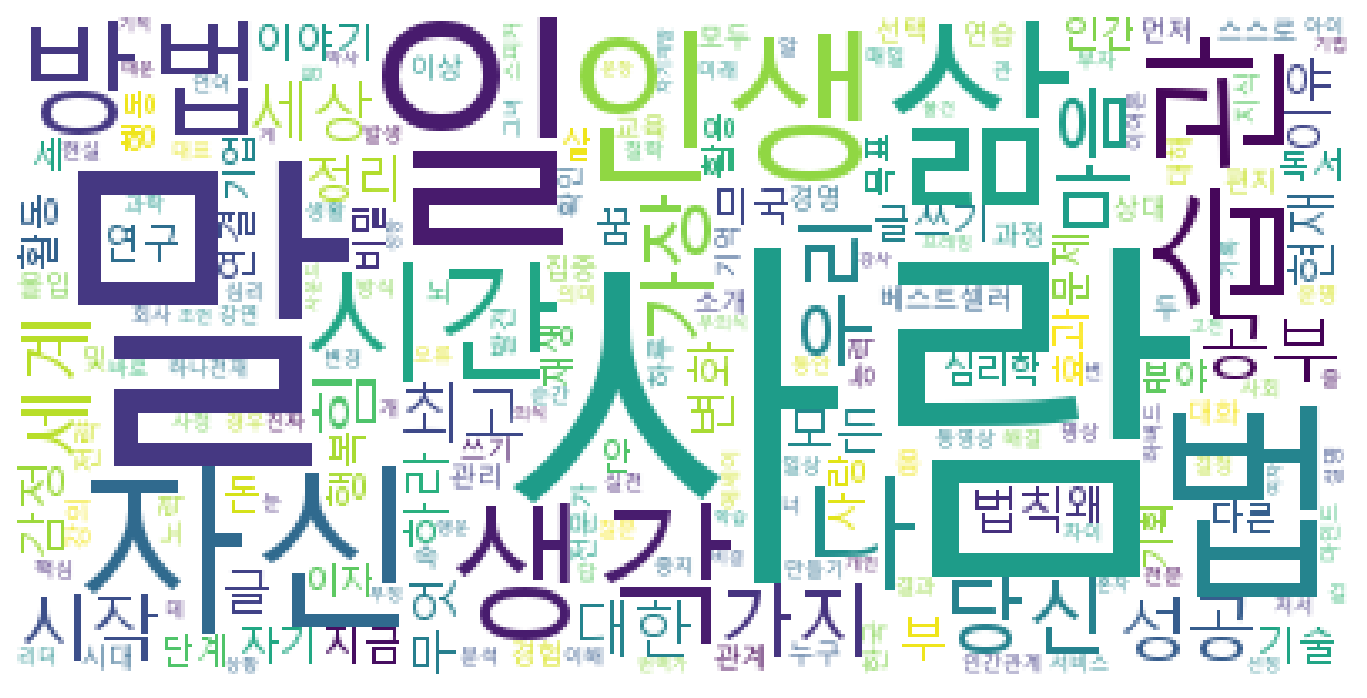

In [90]:
# self-development에 많이 나오는 단어(주제)
data4 = ko4.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path, relative_scaling= 0.2, 
                      background_color='white',
                      ).generate_from_frequencies(dict(data4))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

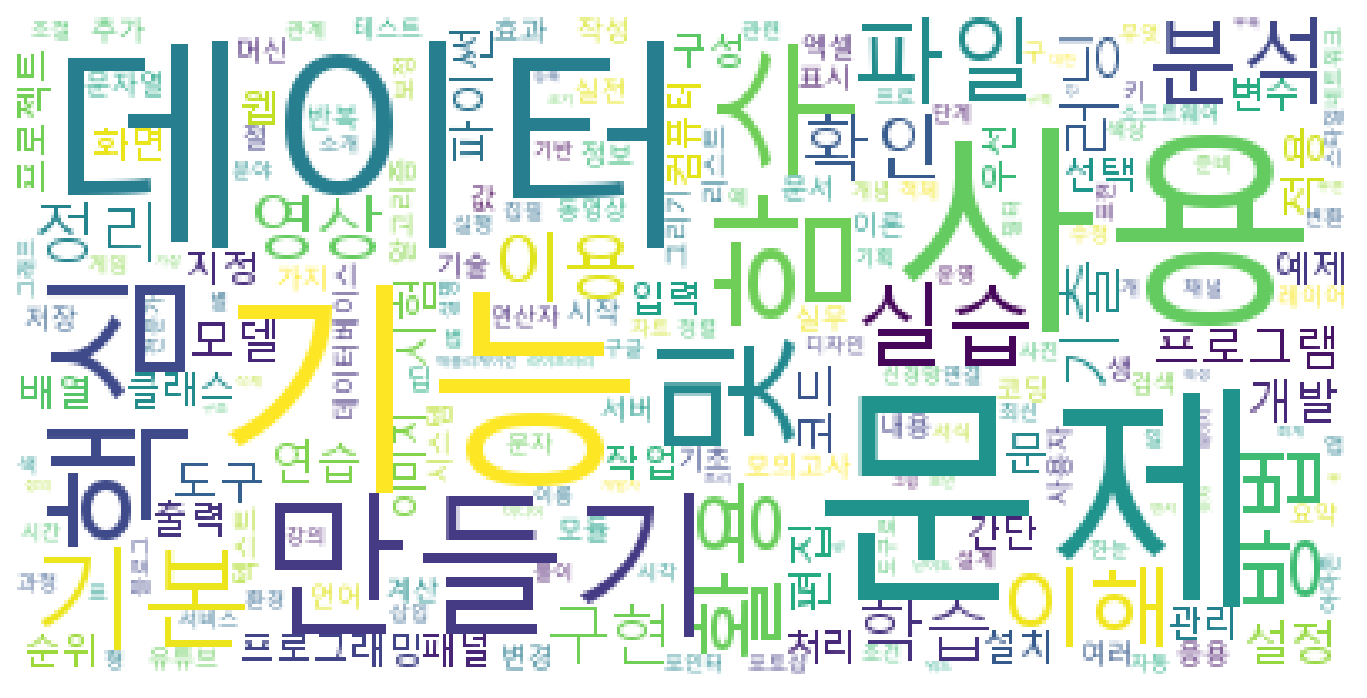

In [105]:
# IT에 많이 나오는 단어(주제)
data5 = ko5.vocab().most_common(200)

wordcloud = WordCloud(font_path=f_path, relative_scaling= 0.2, 
                      background_color='white',
                      ).generate_from_frequencies(dict(data5))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Insight: 책 분야별 많이 나오는 단어/주제
- 소설: 소설, 사랑, 이야기, 사람
- 에세이: 사랑, 사람, 나, 마음, 말
- 인문: 사람, 사회, 우리, 인간, 사회
- 자기계발: 사람, 말, 일, 법, 삶, 인생, 습관
- IT: 문제, 데이터, 기능, 사용, 함수